# **IA aumentada: previsión de atrasos de vuelos**

# 1.EXPLORANDO LOS DATOS

En este curso, vamos a aprender cómo construir un modelo de regresión para predecir los retrasos en vuelos. Para ello, utilizaremos las bibliotecas Pandas, NumPy, scikit-learn, Seaborn y Yellowbrick en las siguientes versiones:

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


###Entendiendo el conjunto de datos

In [ ]:
datos = pd.read_csv('/content/flights.csv')

In [ ]:
datos

flight_id airline aircraft_type      schengen origin  arrival_time  \
0             26      MM   Airbus A320  non-schengen    TCY      8.885071   
1             10      YE   Airbus A320  non-schengen    TCY      8.939996   
2              3      BZ  Embraer E175      schengen    TZF     18.635384   
3             28      BZ   Airbus A330  non-schengen    EMM     15.967963   
4             15      BZ   Airbus A330  non-schengen    FJB     16.571894   
...          ...     ...           ...           ...    ...           ...   
71170          3      BZ  Embraer E175      schengen    TZF     18.635384   
71171         17      BZ   Airbus A330  non-schengen    CNU     16.718722   
71172          7      MM    Boeing 787      schengen    TZF      8.564949   
71173          5      BZ   Airbus A320      schengen    ZQO      9.344097   
71174         29      BZ    Boeing 737      schengen    ZQO      8.591208   

       departure_time  day  year  is_holiday      delay  
0           10.885071    0  2010       False  70.205981  
1           11.939996    0  2010       False  38.484609  
2           22.635384    0  2010       False   2.388305  
3           17.967963    0  2010       False  19.138491  
4           19.571894    0  2010       False  15.016271  
...               ...  ...   ...         ...        ...  
71170       22.635384  364  2022        True  25.677277  
71171       21.718722  364  2022        True  52.624348  
71172       13.564949  364  2022        True  56.167080  
71173       12.344097  364  2022        True  56.758844  
71174       11.591208  364  2022        True  41.401648  

[71175 rows x 11 columns]

In [ ]:
datos.shape

(71175, 11)

In [ ]:
datos.info() #metadatos = datos sobre los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
datos.describe()

flight_id  arrival_time  departure_time           day          year  \
count  71175.000000  71175.000000    71175.000000  71175.000000  71175.000000   
mean      15.465135     13.283159       16.480222    182.000000   2016.000000   
std        8.649646      4.023380        4.143705    105.366769      3.741684   
min        1.000000      7.065594       10.065594      0.000000   2010.000000   
25%        8.000000      8.939996       12.668655     91.000000   2013.000000   
50%       15.000000     14.258911       16.376052    182.000000   2016.000000   
75%       23.000000     16.909690       20.041281    273.000000   2019.000000   
max       30.000000     19.341235       23.341235    364.000000   2022.000000   

              delay  
count  71175.000000  
mean      12.548378  
std       23.125349  
min      -41.028033  
25%       -4.412876  
50%        9.740454  
75%       27.650853  
max      125.632352

In [ ]:
datos.describe(include='O')

airline aircraft_type  schengen origin
count    71175         71175     71175  71175
unique       3             6         2     10
top         BZ   Airbus A320  schengen    TZF
freq     47598         30778     42569  14162

##Análisis gráfico del conjunto de datos

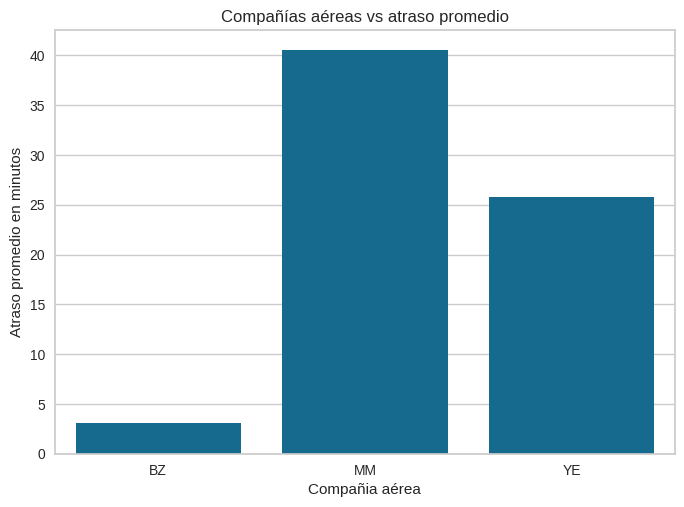

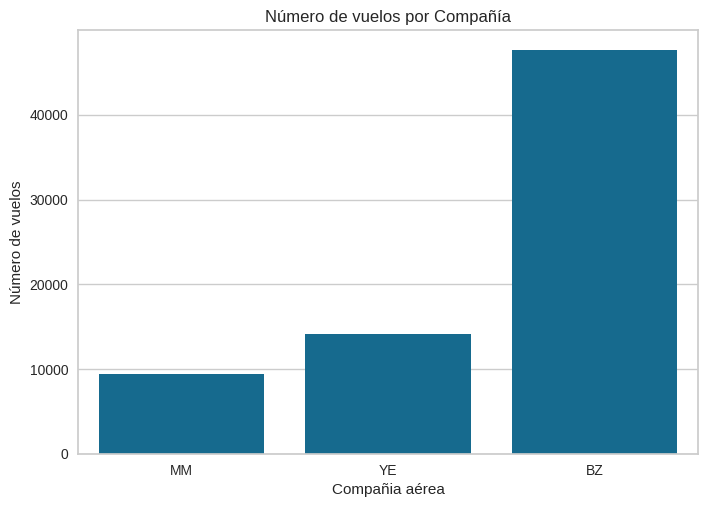

In [ ]:
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañia aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(x='airline',data = datos)
plt.title('Número de vuelos por Compañía')
plt.xlabel('Compañia aérea')
plt.ylabel('Número de vuelos')
plt.show()

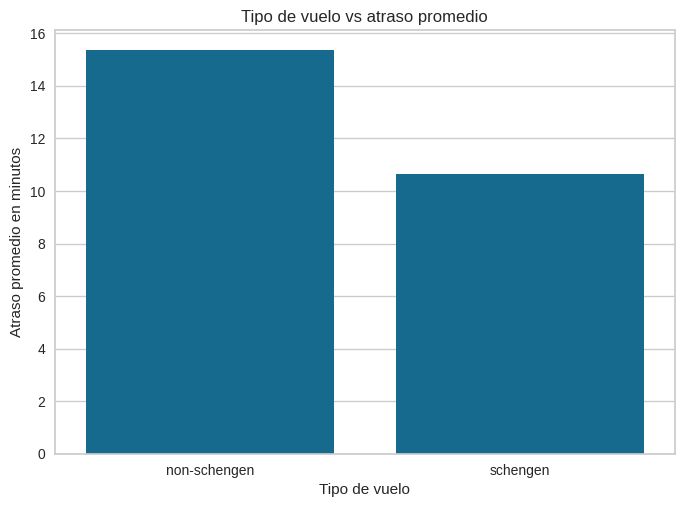

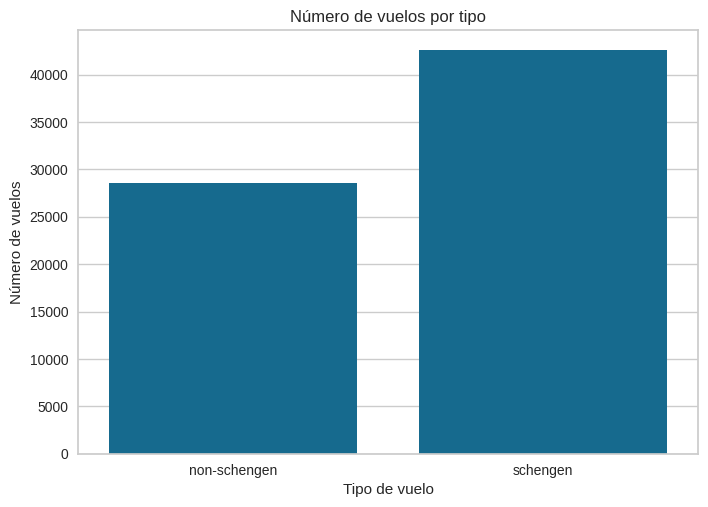

In [ ]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(x='schengen',data = datos)
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

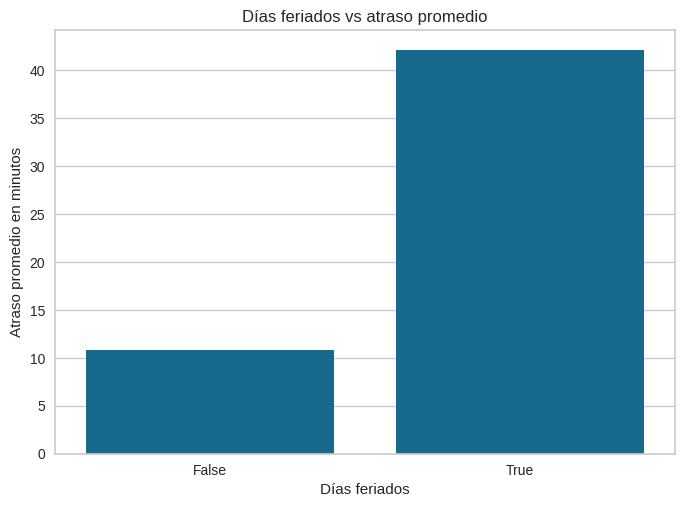

In [ ]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

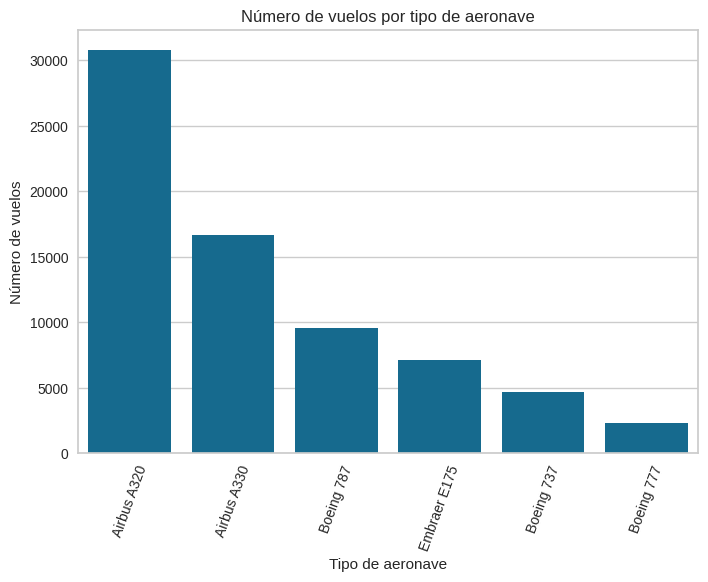

In [ ]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(x='aircraft_type',data = datos, order = order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

###Espacio Schengen




El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.

Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.

##Analizando la distribción de los datos

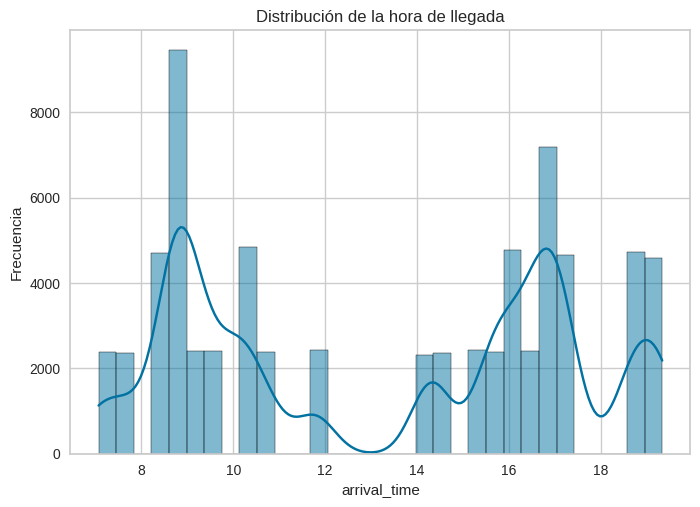

In [ ]:
sns.histplot(data= datos, x='arrival_time', kde= True)
plt.title('Distribución de la hora de llegada')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
def ancho_bin(df,columna):
  q75, q25 = np.percentile(df[columna], [75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

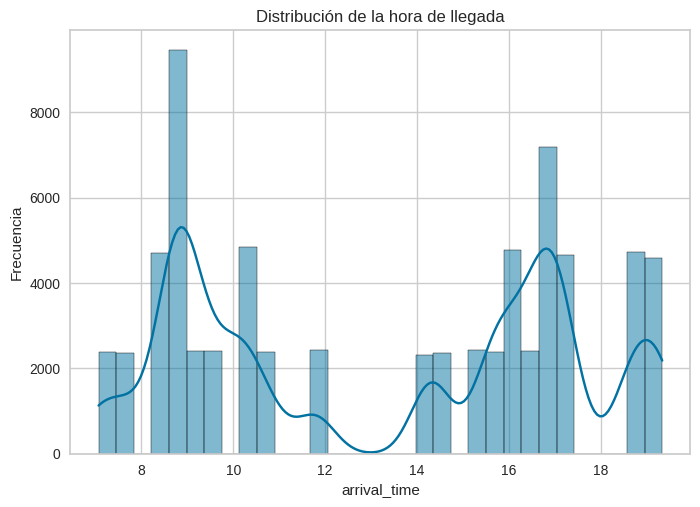

In [ ]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data= datos, x='arrival_time', kde= True , binwidth = binwidth)
plt.title('Distribución de la hora de llegada')
plt.ylabel('Frecuencia')
plt.show()

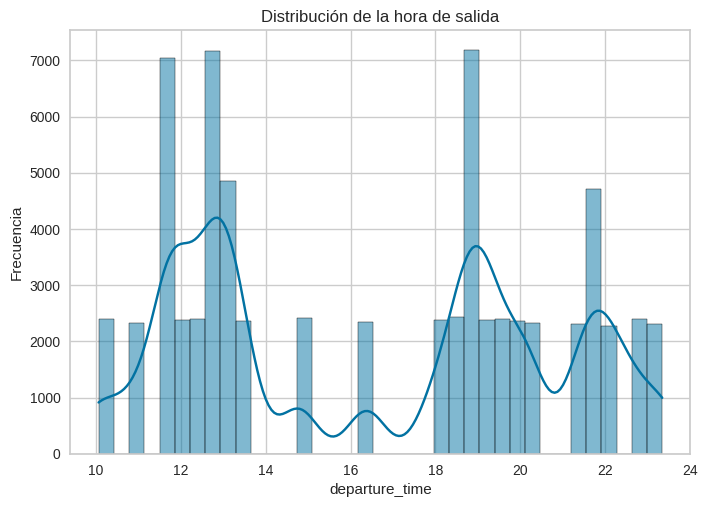

In [ ]:
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data= datos, x='departure_time', kde= True , binwidth = binwidth)
plt.title('Distribución de la hora de salida')
plt.ylabel('Frecuencia')
plt.show()

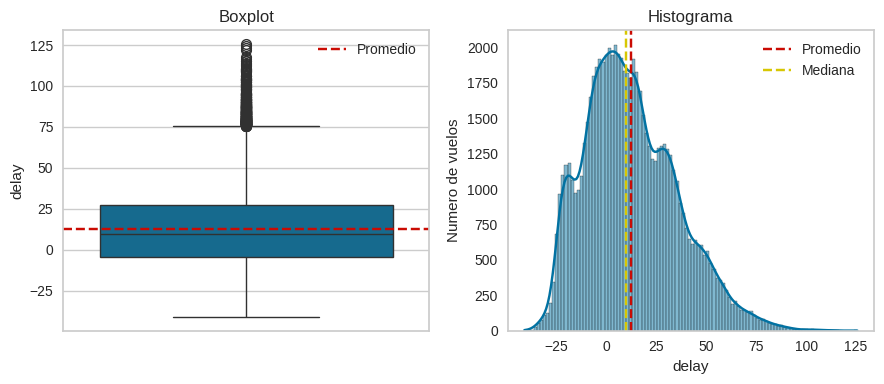

In [ ]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9, 4))

sns.boxplot(data= datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y = atraso_promedio, color='r', linestyle='--', label = 'Promedio')
ax[0].legend()

binwidth= ancho_bin(datos, 'delay')
sns.histplot(data = datos, x='delay', kde= True, ax=ax[1], binwidth = binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x = atraso_promedio, color='r', linestyle='--', label = 'Promedio')
ax[1].axvline(x = atraso_mediana, color='y', linestyle='--', label = 'Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

# 2.FEATURE ENGINEEGING

##Creando nuevas columnas

In [ ]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [ ]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format = '%Y-%j')

In [ ]:
datos.head(2)

flight_id airline aircraft_type      schengen origin  arrival_time  \
0         26      MM   Airbus A320  non-schengen    TCY      8.885071   
1         10      YE   Airbus A320  non-schengen    TCY      8.939996   

   departure_time  day  year  is_holiday      delay       date  
0       10.885071    0  2010       False  70.205981 2010-01-01  
1       11.939996    0  2010       False  38.484609 2010-01-01

In [ ]:
datos['is_weekend']=datos['date'].dt.weekday.isin([5,6])
datos['day_name']=datos['date'].dt.day_name()
datos.sample(2)

flight_id airline aircraft_type      schengen origin  arrival_time  \
19592         13      BZ    Boeing 787  non-schengen    TCY     10.172731   
42627          2      BZ   Airbus A320      schengen    ZQO     19.196804   

       departure_time  day  year  is_holiday      delay       date  \
19592       13.172731  211  2013       False -21.642400 2013-07-31   
42627       22.196804  286  2017       False  21.354138 2017-10-14   

       is_weekend   day_name  
19592       False  Wednesday  
42627        True   Saturday

###¿Qué es el feature engineering?

La Feature engineering implica la creación, transformación y selección de variables a partir de datos en bruto

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**

---
Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.


**La importancia del Feature Engineering:**

---


1. Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.

2. Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.

**Técnicas de Feature Engineering:**

---


Existen varias técnicas de feature engineering, incluyendo:

1. **Creación de features:** Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

2. **Transformación de features:** Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.

3. **Selección de features:** No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

##Feature encoding

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
datos['schengen'] = datos['schengen'].replace({'non-shengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})

datos.sample(3)

flight_id airline aircraft_type      schengen origin  arrival_time  \
64739         16      MM   Airbus A320  non-schengen    CSF     17.041281   
47667          8      BZ   Airbus A320             1    ZQO     15.729617   
51261         17      BZ   Airbus A330  non-schengen    CNU     16.718722   

       departure_time  day  year  is_holiday       delay       date  \
64739       20.041281  300  2021           1  114.200346 2021-10-28   
47667       18.729617  257  2018           0    0.112964 2018-09-15   
51261       21.718722  132  2019           0   20.668413 2019-05-13   

       is_weekend  day_name  
64739           0  Thursday  
47667           1  Saturday  
51261           0    Monday

In [ ]:
categoricas = ['airline','aircraft_type', 'origin', 'day_name', 'schengen']
pd.get_dummies(data = datos, columns = categoricas, dtype = int).head()

flight_id  arrival_time  departure_time  day  year  is_holiday      delay  \
0         26      8.885071       10.885071    0  2010           0  70.205981   
1         10      8.939996       11.939996    0  2010           0  38.484609   
2          3     18.635384       22.635384    0  2010           0   2.388305   
3         28     15.967963       17.967963    0  2010           0  19.138491   
4         15     16.571894       19.571894    0  2010           0  15.016271   

        date  is_weekend  airline_BZ  ...  origin_ZQO  day_name_Friday  \
0 2010-01-01           0           0  ...           0                1   
1 2010-01-01           0           0  ...           0                1   
2 2010-01-01           0           1  ...           0                1   
3 2010-01-01           0           1  ...           0                1   
4 2010-01-01           0           1  ...           0                1   

   day_name_Monday  day_name_Saturday  day_name_Sunday  day_name_Thursday  \
0                0                  0                0                  0   
1                0                  0                0                  0   
2                0                  0                0                  0   
3                0                  0                0                  0   
4                0                  0                0                  0   

   day_name_Tuesday  day_name_Wednesday  schengen_1  schengen_non-schengen  
0                 0                   0           0                      1  
1                 0                   0           0                      1  
2                 0                   0           1                      0  
3                 0                   0           0                      1  
4                 0                   0           0                      1  

[5 rows x 37 columns]

In [ ]:
categoricas = ['airline','aircraft_type', 'origin', 'day_name', 'schengen']
datos_codificados = pd.get_dummies(data = datos, columns = categoricas, dtype = int)
datos_codificados.sample(4)

datos_codificados2 = datos_codificados

##Limpiando los datos

In [ ]:
datos[['arrival_time', 'departure_time']].corr()

arrival_time  departure_time
arrival_time        1.000000        0.973797
departure_time      0.973797        1.000000

In [ ]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   arrival_time                71175 non-null  float64       
 2   departure_time              71175 non-null  float64       
 3   day                         71175 non-null  int64         
 4   year                        71175 non-null  int64         
 5   is_holiday                  71175 non-null  int64         
 6   delay                       71175 non-null  float64       
 7   date                        71175 non-null  datetime64[ns]
 8   is_weekend                  71175 non-null  int64         
 9   airline_BZ                  71175 non-null  int64         
 10  airline_MM                  71175 non-null  int64         
 11  airline_YE                  71175 non-null  int64     

In [ ]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'date', 'year'])
df.head(2)

arrival_time  is_holiday      delay  is_weekend  airline_BZ  airline_MM  \
0      8.885071           0  70.205981           0           0           1   
1      8.939996           0  38.484609           0           0           0   

   airline_YE  aircraft_type_Airbus A320  aircraft_type_Airbus A330  \
0           0                          1                          0   
1           1                          1                          0   

   aircraft_type_Boeing 737  ...  origin_ZQO  day_name_Friday  \
0                         0  ...           0                1   
1                         0  ...           0                1   

   day_name_Monday  day_name_Saturday  day_name_Sunday  day_name_Thursday  \
0                0                  0                0                  0   
1                0                  0                0                  0   

   day_name_Tuesday  day_name_Wednesday  schengen_1  schengen_non-schengen  
0                 0                   0           0                      1  
1                 0                   0           0                      1  

[2 rows x 32 columns]

###¿cómo utilizar el OneHotEncoder de Sklearn?

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

In [ ]:
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_name']
df_encoded = pd.get_dummies(data = datos, columns=categorical_vars, dtype=int)
df_encoded.head()

flight_id      schengen  arrival_time  departure_time  day  year  \
0         26  non-schengen      8.885071       10.885071    0  2010   
1         10  non-schengen      8.939996       11.939996    0  2010   
2          3             1     18.635384       22.635384    0  2010   
3         28  non-schengen     15.967963       17.967963    0  2010   
4         15  non-schengen     16.571894       19.571894    0  2010   

   is_holiday      delay       date  is_weekend  ...  origin_TCY  origin_TZF  \
0           0  70.205981 2010-01-01           0  ...           1           0   
1           0  38.484609 2010-01-01           0  ...           1           0   
2           0   2.388305 2010-01-01           0  ...           0           1   
3           0  19.138491 2010-01-01           0  ...           0           0   
4           0  15.016271 2010-01-01           0  ...           0           0   

   origin_ZQO  day_name_Friday  day_name_Monday  day_name_Saturday  \
0           0                1                0                  0   
1           0                1                0                  0   
2           0                1                0                  0   
3           0                1                0                  0   
4           0                1                0                  0   

   day_name_Sunday  day_name_Thursday  day_name_Tuesday  day_name_Wednesday  
0                0                  0                 0                   0  
1                0                  0                 0                   0  
2                0                  0                 0                   0  
3                0                  0                 0                   0  
4                0                  0                 0                   0  

[5 rows x 36 columns]

Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:

In [ ]:
from sklearn.compose import make_column_transformer # aplicar transformaciones específicas a columnas específicas de un DataFrame.
from sklearn.preprocessing import OneHotEncoder #realiza la codificación one-hot.

categoricas = ['airline','aircraft_type','origin','day_name']
  #Aquí, estamos definiendo una lista de nombres de columnas que
  # queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

one_hot_enc = make_column_transformer( #estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas.
    (OneHotEncoder(handle_unknown='ignore'), #OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación.
    categoricas),
    remainder='passthrough') #significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

datos_encoded = one_hot_enc.fit_transform(datos)
  #El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

datos_encoded = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos_encoded

onehotencoder__airline_BZ  onehotencoder__airline_MM  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   
...                          ...                        ...   
71170                        NaN                        NaN   
71171                        NaN                        NaN   
71172                        NaN                        NaN   
71173                        NaN                        NaN   
71174                        NaN                        NaN   

       onehotencoder__airline_YE  onehotencoder__aircraft_type_Airbus A320  \
0                            NaN                                       NaN   
1                            NaN                                       NaN   
2                            NaN                                       NaN   
3                            NaN                                       NaN   
4                            NaN                                       NaN   
...                          ...                                       ...   
71170                        NaN                                       NaN   
71171                        NaN                                       NaN   
71172                        NaN                                       NaN   
71173                        NaN                                       NaN   
71174                        NaN                                       NaN   

       onehotencoder__aircraft_type_Airbus A330  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
71170                                       NaN   
71171                                       NaN   
71172                                       NaN   
71173                                       NaN   
71174                                       NaN   

       onehotencoder__aircraft_type_Boeing 737  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
71170                                      NaN   
71171                                      NaN   
71172                                      NaN   
71173                                      NaN   
71174                                      NaN   

       onehotencoder__aircraft_type_Boeing 777  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
71170                                      NaN   
71171                                      NaN   
71172                                      NaN   
71173                                      NaN   
71174                                      NaN   

       onehotencoder__aircraft_type_Boeing 787  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
71170                                      NaN   
71171                                      NaN   
71172                                      NaN  

#

# 3.SELECCIÓN Y VALIDACIÓN DEL MODELO

## Definiendo una baseline

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split #permite separar los datos

X = df.drop(columns='delay', axis = 1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)

DummyRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error # Error absoluto medio
from sklearn.metrics import mean_squared_error # Raiz cuadrada del error
from sklearn.metrics import r2_score # Coeficiente de determinación

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {'RMSE':round(rmse**(1/2), 4),
              'MAE':round(mae, 4),
              'R2':round(r2, 4)}

  return metricas

In [ ]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

## Entrenando con bosques aleatorias

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth = 5, random_state=42)
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)

resultadoos_rf = calcular_regresion(y_test, ypred)
resultadoos_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

https://www.scikit-yb.org/en/latest/api/regressor/peplot.html

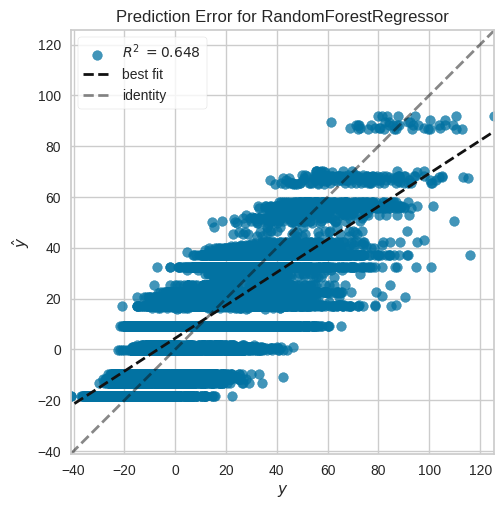

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(modelo)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

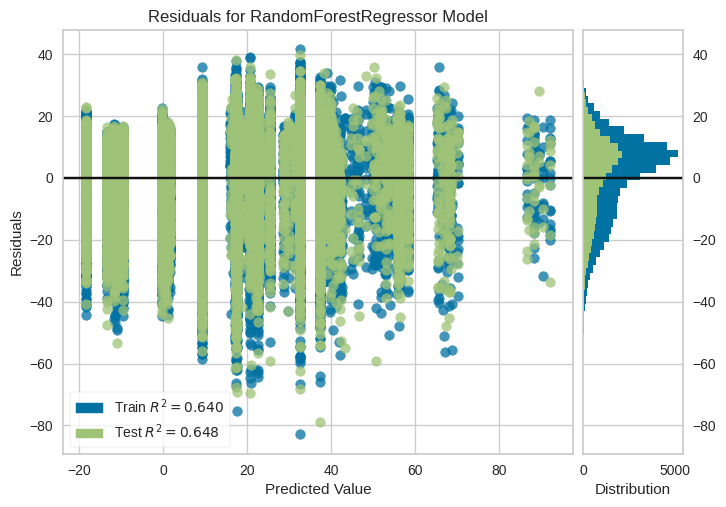

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

Se busca que los valores de Train y Test sean muy parecidos

### **Modelo RandomForestRegressor**

El riesgo de overfitting aumenta considerablemente cuando la profundidad máxima (max_depth) de los árboles de decisión se incrementa excesivamente.


La combinación de varios árboles de decisión en un ensemble ayuda a reducir el overfitting, haciendo que el modelo sea más robusto frente a este problema.

## Realizando cros validation (Validacion cruzada)

Usar diferentes para entrenar y luego para validar, y luego se usan en todas las combinaciones posibles.

In [ ]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE': 'neg_root_mean_squared_error', # Se usa "neg" porque se busca aumentar la rentabilidad
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold(n_splits= 5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv= cv)
cv_results

{'fit_time': array([3.12668347, 3.21565533, 3.9789753 , 4.39794159, 3.23913431]),
 'score_time': array([0.06090117, 0.0623982 , 0.07215548, 0.05457473, 0.3600502 ]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

### Validación cruzada

La validación cruzada es una técnica robusta utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Divide el conjunto de datos en 'k' partes iguales, o 'folds', entrena el modelo en 'k-1' de estas partes y prueba el modelo en la parte restante. Este proceso se repite 'k' veces, cada vez con una parte diferente siendo utilizada como conjunto de prueba. Cada una de estas iteraciones se llama 'fold', y el promedio de la medida de rendimiento en todas las 'k' iteraciones proporciona una estimación más confiable del rendimiento del modelo.

# 4.OPTIMIZACIÓN DE HIPERPARÁMETROS

##Feature importances

In [ ]:
len(df.columns)


32

In [ ]:
importances = modelo.feature_importances_

In [ ]:
feature_importances_ = pd.DataFrame({'Features':X.columns, 'Importances':(importances*100).round(2)}).sort_values('Importances', ascending = False)
feature_importances_

Features  Importances
3                   airline_BZ        53.03
1                   is_holiday        14.59
6    aircraft_type_Airbus A320        10.07
7    aircraft_type_Airbus A330         5.76
11  aircraft_type_Embraer E175         4.59
0                 arrival_time         3.65
19                  origin_TCY         2.67
10    aircraft_type_Boeing 787         2.07
14                  origin_CSF         1.58
18                  origin_PUA         0.98
20                  origin_TZF         0.71
22             day_name_Friday         0.09
8     aircraft_type_Boeing 737         0.05
17                  origin_MWL         0.05
13                  origin_CNU         0.02
21                  origin_ZQO         0.02
28          day_name_Wednesday         0.01
12                  origin_AUZ         0.01
9     aircraft_type_Boeing 777         0.01
2                   is_weekend         0.01
25             day_name_Sunday         0.01
16                  origin_FJB         0.01
23             day_name_Monday         0.01
27            day_name_Tuesday         0.01
5                   airline_YE         0.00
4                   airline_MM         0.00
15                  origin_EMM         0.00
26           day_name_Thursday         0.00
24           day_name_Saturday         0.00
29                  schengen_1         0.00
30       schengen_non-schengen         0.00

In [ ]:
resultados = pd.DataFrame(index =['RMSE', 'MAE', 'R2'])
model_features= RandomForestRegressor(max_depth = 5, random_state=42)
ct_features = [ i if i != 0 else 1 for i in range (0,35,5)]

for i in ct_features:
  select_features = feature_importances_['Features'].values[:i]
  X_train_sel = X_train[select_features]
  X_test_sel = X_test[select_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)

  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

1        5        10       15       20       25       30
RMSE  18.8331  15.1564  13.7587  13.7495  13.7484  13.7473  13.7479
MAE   14.9620  12.0605  11.0422  11.0281  11.0277  11.0259  11.0262
R2     0.3388   0.5718   0.6471   0.6476   0.6476   0.6477   0.6477

In [ ]:
resultados = pd.DataFrame(index =['RMSE', 'MAE', 'R2'])
model_features= RandomForestRegressor(max_depth = 5, random_state=42)
ct_features = range (10,16)

for i in ct_features:
  select_features = feature_importances_['Features'].values[:i]
  X_train_sel = X_train[select_features]
  X_test_sel = X_test[select_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)

  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

10       11       12       13       14       15
RMSE  13.7587  13.7564  13.7526  13.7496  13.7497  13.7495
MAE   11.0422  11.0425  11.0312  11.0282  11.0285  11.0281
R2     0.6471   0.6472   0.6474   0.6476   0.6476   0.6476

In [ ]:
select_features = feature_importances_['Features'].values[:13]
X_selected_features = X[select_features]

X_selected_features

airline_BZ  is_holiday  aircraft_type_Airbus A320  \
0               0           0                          1   
1               0           0                          1   
2               1           0                          0   
3               1           0                          0   
4               1           0                          0   
...           ...         ...                        ...   
71170           1           1                          0   
71171           1           1                          0   
71172           0           1                          0   
71173           1           1                          1   
71174           1           1                          0   

       aircraft_type_Airbus A330  aircraft_type_Embraer E175  arrival_time  \
0                              0                           0      8.885071   
1                              0                           0      8.939996   
2                              0                           1     18.635384   
3                              1                           0     15.967963   
4                              1                           0     16.571894   
...                          ...                         ...           ...   
71170                          0                           1     18.635384   
71171                          1                           0     16.718722   
71172                          0                           0      8.564949   
71173                          0                           0      9.344097   
71174                          0                           0      8.591208   

       origin_TCY  aircraft_type_Boeing 787  origin_CSF  origin_PUA  \
0               1                         0           0           0   
1               1                         0           0           0   
2               0                         0           0           0   
3               0                         0           0           0   
4               0                         0           0           0   
...           ...                       ...         ...         ...   
71170           0                         0           0           0   
71171           0                         0           0           0   
71172           0                         1           0           0   
71173           0                         0           0           0   
71174           0                         0           0           0   

       origin_TZF  day_name_Friday  aircraft_type_Boeing 737  
0               0                1                         0  
1               0                1                         0  
2               1                1                         0  
3               0                1                         0  
4               0                1                         0  
...           ...              ...                       ...  
71170           1                0                         0  
71171           0                0                         0  
71172           1                0                         0  
71173           0                0                         0  
71174           0                0                         1  

[71175 rows x 13 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

##Optimización hiperparámetros con GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100, 200, 300]

}

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits= 5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state = 42),
                          param_grid = param_grid, scoring = 'r2', cv = cv )

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [71]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [72]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'RMSE': 13.2307, 'MAE': 10.6296, 'R2': 0.6754}

In [73]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

10       11       12       13       14       15  modelo_grid
RMSE  13.7587  13.7564  13.7526  13.7496  13.7497  13.7495      13.2307
MAE   11.0422  11.0425  11.0312  11.0282  11.0285  11.0281      10.6296
R2     0.6471   0.6472   0.6474   0.6476   0.6476   0.6476       0.6754

### Cantidad de combinaciones

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
 'max_depth': [5, 10, 15],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 150, 200]
 }

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
model_grid.fit(X_train, y_train)



Para calcular cuántas veces se entrena y evalúa el algoritmo, multiplicamos el número de combinaciones únicas de hiperparámetros por el número de pliegues en la validación cruzada.

Hay 3 opciones para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' y 3 para 'n_estimators'. Por lo tanto, el número total de combinaciones únicas de hiperparámetros es 3 * 3 * 3 * 3 = 81. Como estamos usando validación cruzada de 3 pliegues, cada conjunto de hiperparámetros será entrenado y evaluado 3 veces. Por lo tanto, el algoritmo será entrenado y evaluado 81 * 3 = 243 veces en total.

### Hiperparámetros del RandomForestRegressor

El RandomForestRegressor es un modelo de conjunto que combina varios árboles de decisión para hacer predicciones más robustas y precisas a través de la técnica de Bagging.

Los hiperparámetros son configuraciones que puedes ajustar para controlar el comportamiento del RandomForestRegressor. A continuación, se presenta una lista de los principales hiperparámetros:

**1 - n_estimators:**

- Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.

**2 - criterion:**

- El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.


**3 - max_depth:**

- Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.

**4 - min_samples_split:**

- El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.

***5 - min_samples_leaf:***

- Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.

**6 - max_features:**

- max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.


**7 - random_state:**

- Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.

**8 - n_jobs:**

- n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.


Estos son algunos de los principales hiperparámetros del RandomForestRegressor en scikit-learn. La elección adecuada de estos hiperparámetros puede afectar significativamente el rendimiento y la capacidad de generalización del modelo para tareas de regresión. Para consultar los otros hiperparámetros faltantes, puedes consultar la documentación oficial de scikit-learn.

##Serializando el modelo

In [74]:
import pickle

try:
  with open('championm.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_,file)

  print('Modelo serializado con éxito')

except Exception as e:
  print('Se presento un error al almacenar el modelo:',str(e))

Modelo serializado con éxito


###Manos a la obra: utilizando el modelo guardado

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [75]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Donde los valores corresponden a:

```python
schengen: 0
arrival_time: 10.8941
is_holiday: 0
is_weekend: 0
airline_BZ: 0
airline_MM: 0
airline_YE: 1
aircraft_type_Airbus A320: 1
aircraft_type_Airbus A330: 0
aircraft_type_Boeing 737: 0
aircraft_type_Boeing 777: 0
aircraft_type_Boeing 787: 0
aircraft_type_Embraer E175: 0


In [76]:
import pickle

file_path = '/content/championm.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


In [77]:
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra])[0]

np.float64(48.55789703432558)